# Phân tích, xử lí, dự đoán dữ liệu Titanic 

## 1. Định nghĩa vấn đề
+ **mô tả:**
    + Tập dữ liệu gồm 12 thuộc tính và có 891 bộ. Được sử dụng để dự đoán khả năng sống sốt hành khách.
    + Tỉ lệ phân lớp của dữ liệu là 549 khống sống sót và 342 người sống sót.
+ **Đầu vào:**
    + PassengerID: mã số người sống sót.
    + pclass: thứ hạng vé
    + sex: giới tính
    + Age: tuổi
    + sibsp: số anh/chị/em và vợ/ chồng quen biết trên titanic
    + parch: số cha/mẹ và con cái trên titanic
    + ticket: số vé
    + fare: giá vé
    + cabin: số cabin
    + embarked: cảng lên tàu
+ **Đầu ra:**
    + Survived (0/1): sống hay không sống sót.

## 2. Chuẩn bị dữ liệu

### 2.1 Khai báo thư viện

In [29]:
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

### 2.2 Nạp dữ liệu

In [30]:
df = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

## 3. Phân tích khám phá dữ liệu (EDA)

### 3.1 Xem xét dữ liệu

#### 1. xem qua thông tin dữ liệu train

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 2. Giới tính

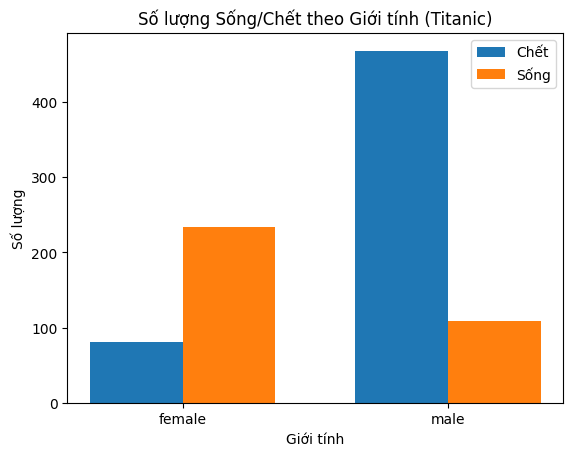

In [32]:
thongke = pd.crosstab(df['Sex'], df['Survived'])
thongke = thongke.rename(columns={0:'Chet', 1:'Song'})

x = range(len(thongke))
width = 0.35

plt.bar([i - width/2 for i in x], thongke['Chet'], width=width, label='Chết')
plt.bar([i + width/2 for i in x], thongke['Song'], width=width, label='Sống')

plt.xticks(x, thongke.index)
plt.xlabel('Giới tính')
plt.ylabel('Số lượng')
plt.title('Số lượng Sống/Chết theo Giới tính (Titanic)')
plt.legend()
plt.show()


#### 3. Hạng vé

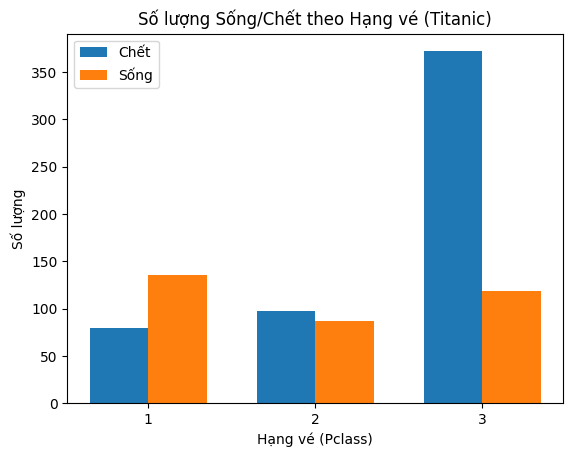

In [33]:
thongke = pd.crosstab(df['Pclass'], df['Survived'])
thongke = thongke.rename(columns={0:'Chet', 1:'Song'})

x = range(len(thongke))
width = 0.35

plt.bar([i - width/2 for i in x], thongke['Chet'], width=width, label='Chết')
plt.bar([i + width/2 for i in x], thongke['Song'], width=width, label='Sống')

plt.xticks(x, thongke.index)
plt.xlabel('Hạng vé (Pclass)')
plt.ylabel('Số lượng')
plt.title('Số lượng Sống/Chết theo Hạng vé (Titanic)')
plt.legend()
plt.show()


#### 4. Đi cùng nhau


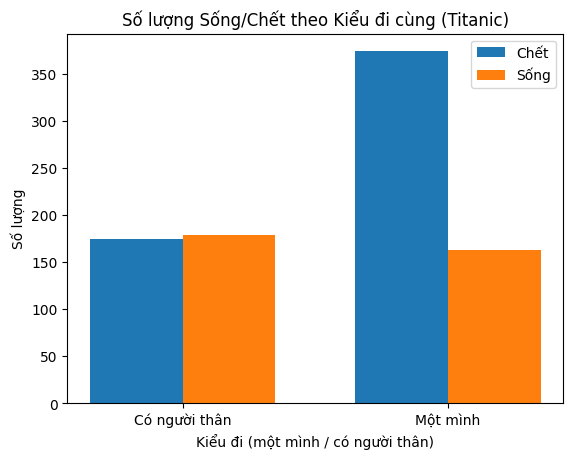

In [34]:
# Tạo cột mới để phân loại: đi 1 mình hay có người thân
df['DiCung'] = df['SibSp'] + df['Parch']
df['LoaiDi'] = df['DiCung'].apply(lambda x: 'Một mình' if x == 0 else 'Có người thân')

# Thống kê số người sống/chết theo kiểu đi
thongke = pd.crosstab(df['LoaiDi'], df['Survived'])
thongke = thongke.rename(columns={0:'Chet', 1:'Song'})

# Vẽ biểu đồ
x = range(len(thongke))
width = 0.35

plt.bar([i - width/2 for i in x], thongke['Chet'], width=width, label='Chết')
plt.bar([i + width/2 for i in x], thongke['Song'], width=width, label='Sống')

plt.xticks(x, thongke.index)
plt.xlabel('Kiểu đi (một mình / có người thân)')
plt.ylabel('Số lượng')
plt.title('Số lượng Sống/Chết theo Kiểu đi cùng (Titanic)')
plt.legend()
plt.show()


#### 5. Bến cảng

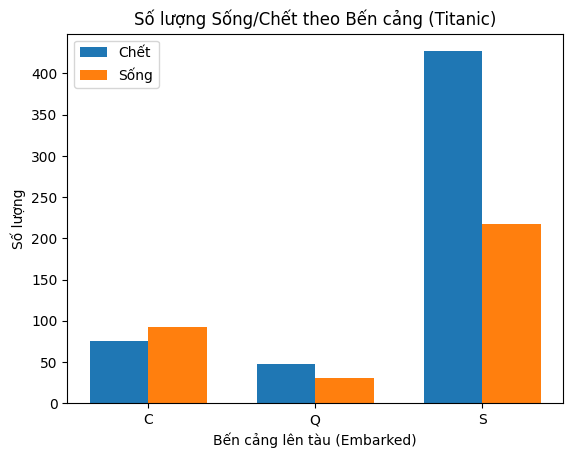

In [35]:
# Thống kê số người sống/chết theo bến cảng (Embarked)
thongke = pd.crosstab(df['Embarked'], df['Survived'])
thongke = thongke.rename(columns={0:'Chet', 1:'Song'})

# Vẽ biểu đồ
x = range(len(thongke))
width = 0.35

plt.bar([i - width/2 for i in x], thongke['Chet'], width=width, label='Chết')
plt.bar([i + width/2 for i in x], thongke['Song'], width=width, label='Sống')

plt.xticks(x, thongke.index)
plt.xlabel('Bến cảng lên tàu (Embarked)')
plt.ylabel('Số lượng')
plt.title('Số lượng Sống/Chết theo Bến cảng (Titanic)')
plt.legend()
plt.show()


### 3.2 Thống kê mô tả (Descriptive Statistics)

#### 1. **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ Thông tin chung về dữ liệu

In [36]:
# shape
print(f'+ Shape: {df.shape}')
# types
print(f'+ Data Types: \n{df.dtypes}')
# head, tail
print(f'+ Contents: ')
# info
df.info()

+ Shape: (891, 14)
+ Data Types: 
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
DiCung           int64
LoaiDi          object
dtype: object
+ Contents: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cab

**Nhận xét:**
+ Tập dữ liệu có 5 kiểu string, 2 số thực, và 5 số nguyên.
+ Các dữ liệu không theo chung một thang đo nhất định.
+ Tổng cộng có 891 bộ dữ liệu.

#### 2. Kiểm tra tính toàn vẹn của dữ liệu
+ Dữ liệu có bị trùng lặp không?
+ Dữ liệu có tồn tại giá trị Null không?
+ Dữ liệu có tồn tại giá trị NaN không?

In [37]:
display.display(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
DiCung           0
LoaiDi           0
dtype: int64

In [38]:
display.display(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
DiCung           0
LoaiDi           0
dtype: int64

In [39]:
df.duplicated().sum()

np.int64(0)

**Nhận xét:**
+ bao gồm 687 bộ dữ liệu có thuộc tính Cabin null/Nan  và 177 bộ có thuộc tính tuổi null/Nan.
+ không có bất kì bộ nào bị trùng lập.

#### 3. Tiền xử lí dữ liệu

In [40]:
most_common_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(most_common_embarked)

df['Age'] = df['Age'].fillna(df['Age'].mean())

df.drop(columns=['Cabin'], inplace=True)
test.drop(columns=['Cabin'], inplace=True)

df.drop(columns=['Ticket'], inplace=True)
test.drop(columns=['Ticket'], inplace=True)

df.drop(columns=['PassengerId', 'Name'], inplace=True)
test.drop(columns=['PassengerId', 'Name'], inplace=True)
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
DiCung      0
LoaiDi      0
dtype: int64

#### 4. Thống kê trên dữ liệu số
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292
DiCung,891.0,0.904602,1.613459,0.00,0.0000,0.000000,1.0,10.0000


**Nhận xét:**
+ phần lớn hành khách ở khoa hạng 2 và 3.
+ Các giá trị không cùng thang đo.

#### 5. Tỉ lệ phấn phối lớp (Class distribution)

In [42]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

**Nhận xét:**
+ Phân bố không đều có 549 người không sót và 342 người sống sót

### 3.2 Trực quan hóa dữ liệu
+ Phân bố của dữ liệu.
+ Xác định ngoại lệ
+ Độ Tương quan của dữ liệu.
+ Độ xiên của dữ liệu.

#### 1.Độ phân bố của dữ liệu

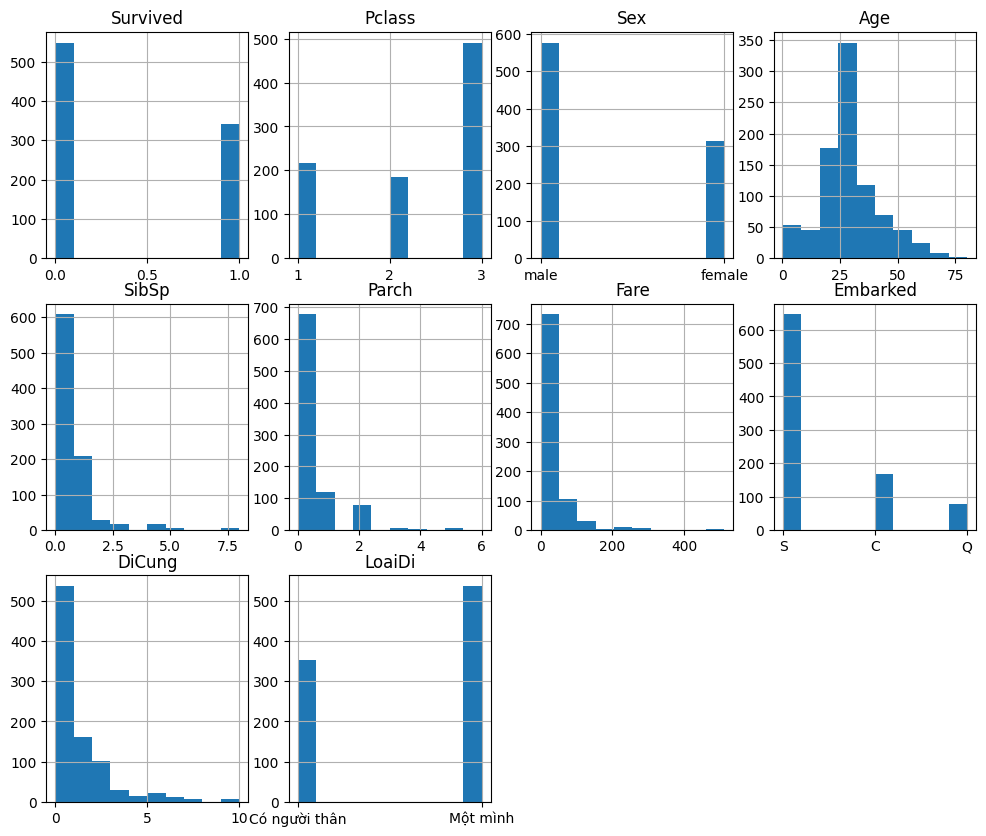

In [43]:
plt.figure(figsize=(12, 10))
for num,name in enumerate(df,1):
    plt.subplot(3, 4, num)
    df[name].hist()
    plt.title(name)
plt.show()

+ **Nhân xét:**
    + Số lượng hành khách không sống sót cao hơn.
    + gần một nửa số lượng hành khách ở khoa hạng 3.
    + Số lượng nam gần như gấp đôi nữ.
    + Phần lớn số lượng hành khách có độ tuổi dao động trong khoảng 20 đến 30 tuổi.
    + Đa phần hành khách đi một mình.
    + Giá vé tập trung trong khoản 50 đơn vị tiền tệ tương đương với sự phân bố ở các khoa hạng.
    + phần lớn hành khách lên ở cảng Southampton.

#### 2. Xác định ngoại lệ

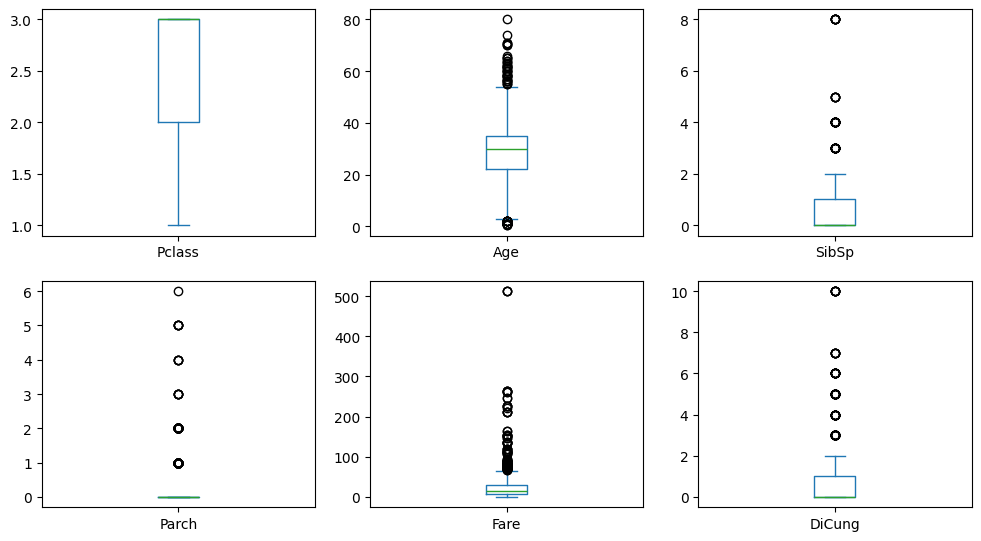

In [44]:
df.drop(columns="Survived").plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,10))
plt.show()

+ **Nhận xét:**
    + chỉ có Khoa hạng là không có ngoại lệ, tuy nhiên các ngoại lệ của các thuộc tính còn lại đều là ngoại lệ hợp lệ.

#### 3.Độ tương quan (Correlation)

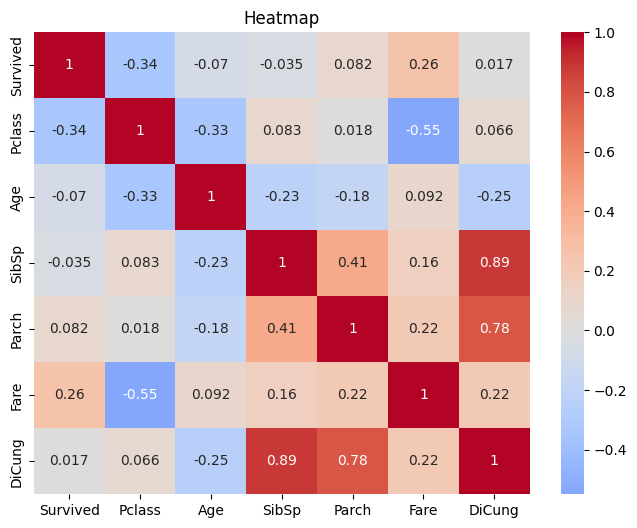

In [45]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Heatmap")
plt.show()

<Figure size 800x600 with 0 Axes>

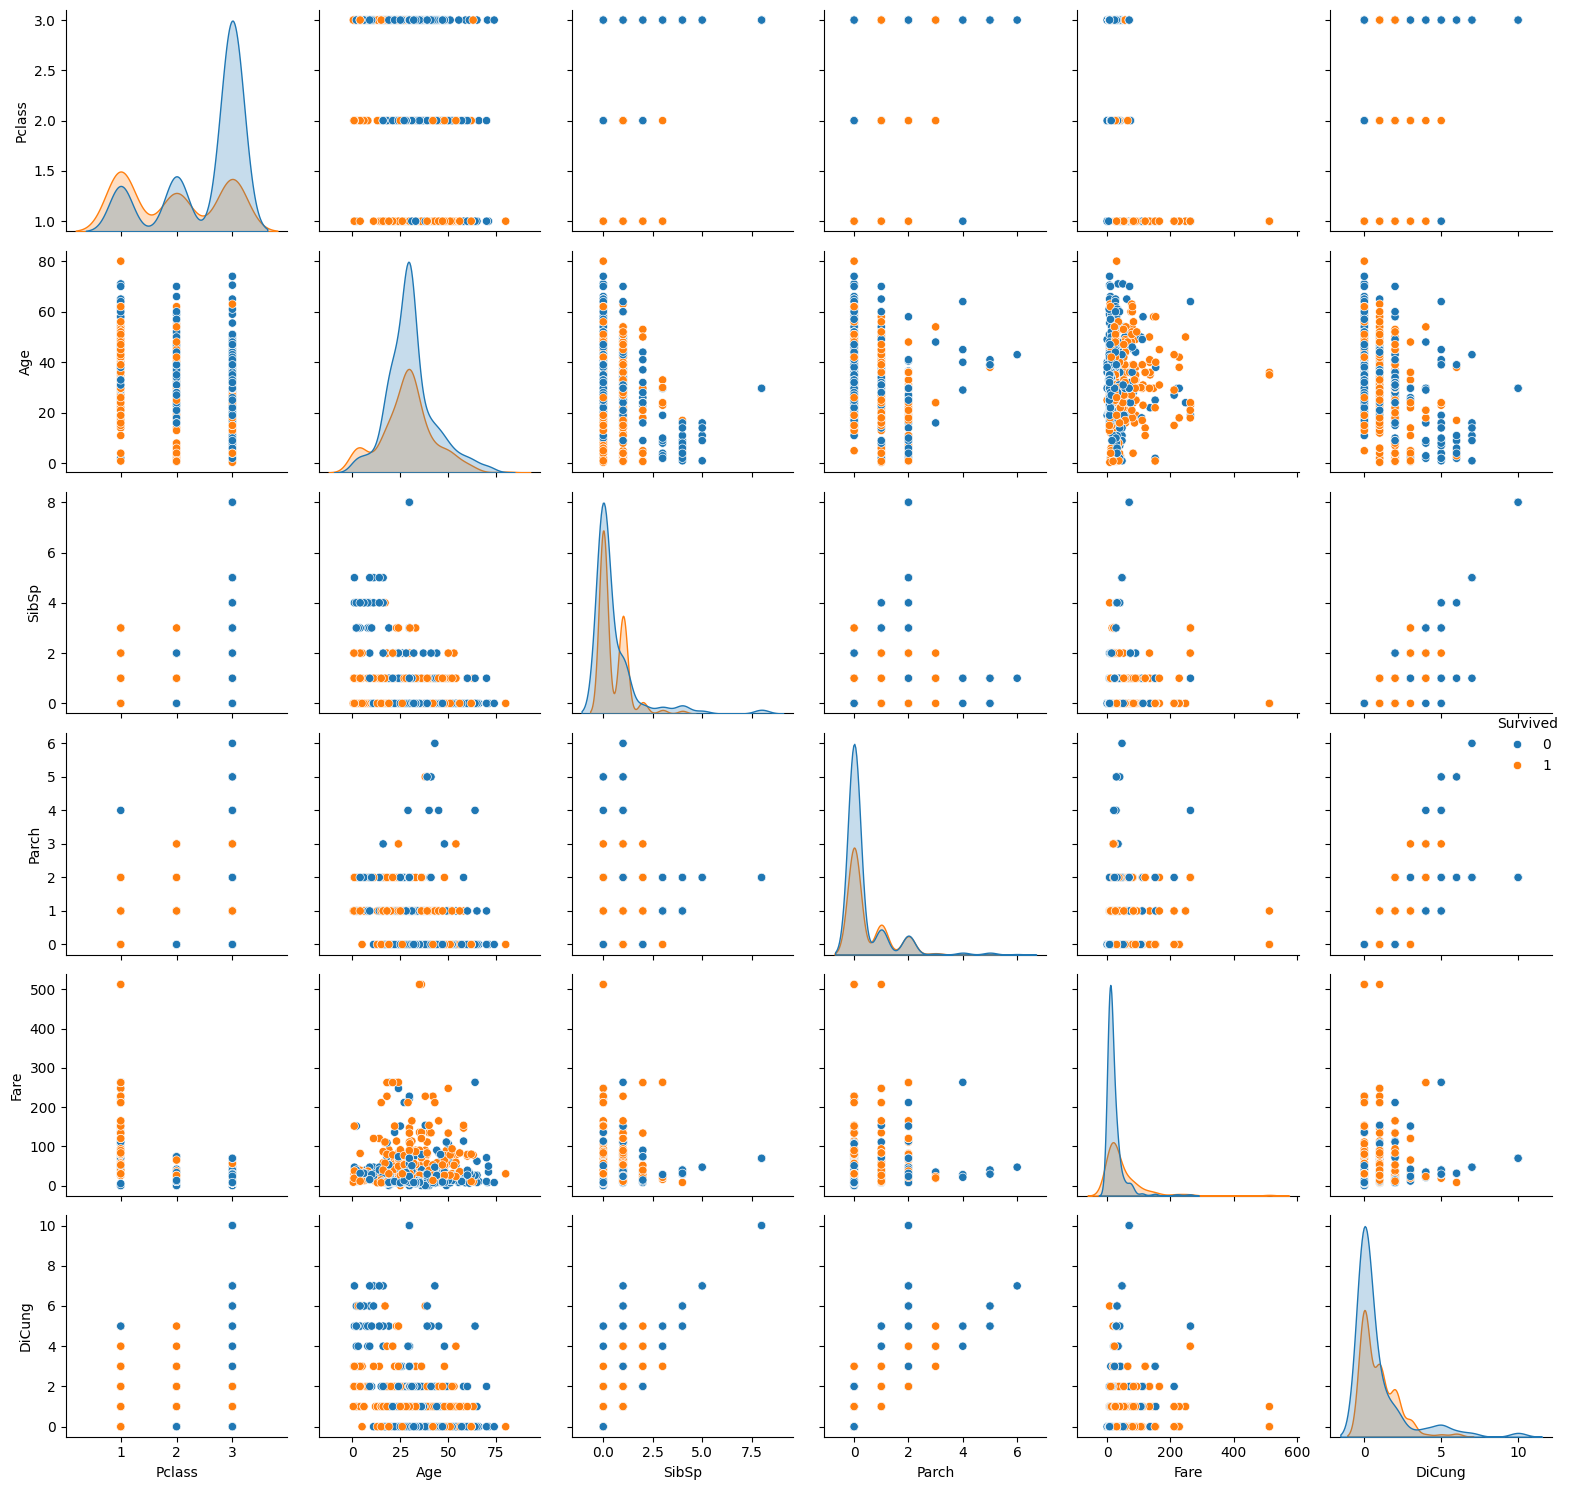

In [46]:
plt.figure(figsize=(8,6))
sns.pairplot(df.select_dtypes(include='number'), hue= "Survived")
plt.tight_layout()
plt.show()

+ **Nhận xét:**
    + Không có tương quan cao chỉ ở trung bình và thấp hay gần như không tương quan như chỉ số cha/mẹ và con cháu với khoa hạng.
    + Người ở khoa hạng nhất có tỉ lệ sống sót cao hơn ở mọi thuộc tính số khác.
    + Giá vé cao có tỉ lệ sống sót nhiều hơn.
    + Những hành khách có số lượng người thân từ 3 trở xuống đều có tỉ lệ sống tốt hơn

#### 4. Độ xiên của dữ liệu

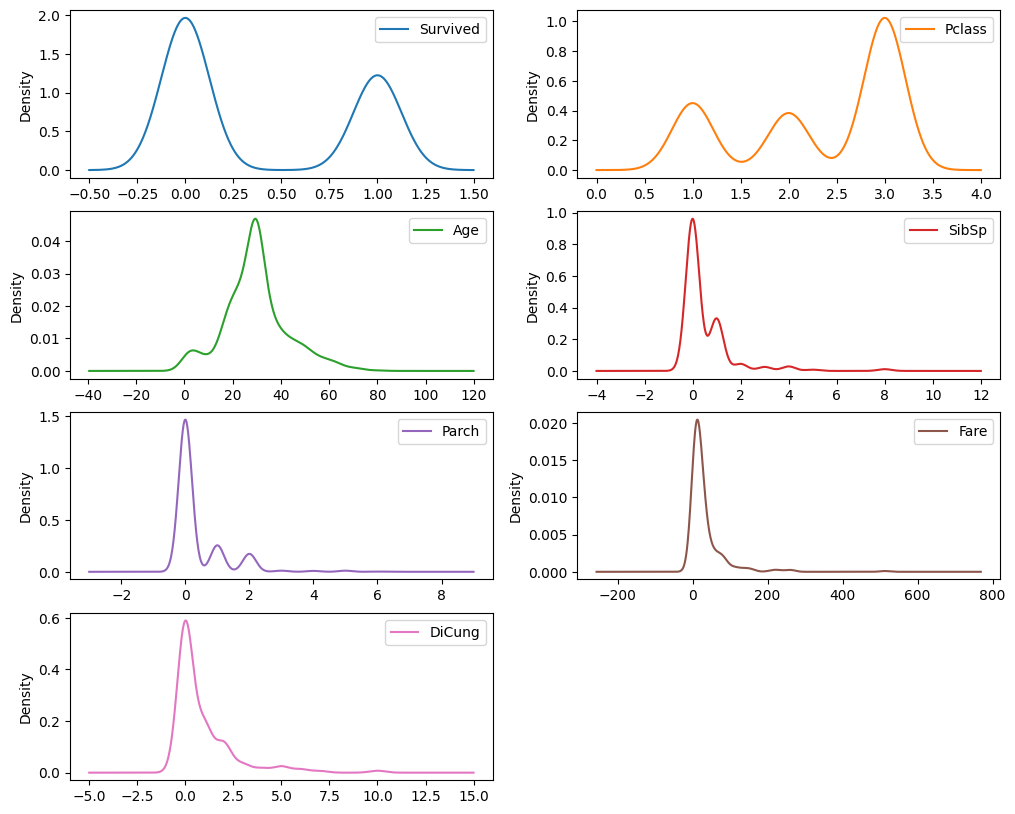

In [47]:
df.plot(kind="density", subplots=True, layout=(4,2), sharex=False, figsize=(12,10))
plt.show()

In [48]:
df.select_dtypes(include='number').skew()

Survived    0.478523
Pclass     -0.630548
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
DiCung      2.727441
dtype: float64

+ **Nhận xét:**
    + Các chỉ số người thân của hành khách, giá tàu có độ xiêm rất lớn và về phía bên trái theo biểu đồ phân bố.

## 3. Tiền xử lí dữ liệu (Data preprocessing)

### 3.1 Biến đổi dữ liệu (Data transform)

In [49]:
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [50]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)

In [51]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,DiCung,LoaiDi,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,1,Có người thân,False,True
1,1,1,1,38.0,1,0,71.2833,1,Có người thân,False,False
2,1,3,1,26.0,0,0,7.9250,0,Một mình,False,True
3,1,1,1,35.0,1,0,53.1000,1,Có người thân,False,True
4,0,3,0,35.0,0,0,8.0500,0,Một mình,False,True


### 3.2 Phân chia tập train và validate (7:3)

In [53]:
X = df.drop(columns=["Survived","LoaiDi","DiCung"],axis=1)
Y = df["Survived"]
X = X.values
Y = Y.values
validation_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

##

#### 1.Normalize Data

In [54]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X_train)
normalizerX = scaler.transform(X_train)
print(X_train)

[[3 1 19.0 ... 7.8542 False True]
 [2 0 19.0 ... 13.0 False True]
 [2 0 52.0 ... 13.0 False True]
 ...
 [1 1 30.0 ... 106.425 False False]
 [3 0 29.69911764705882 ... 7.75 True False]
 [3 0 18.0 ... 7.8542 False True]]


- Rescale dữ liệu về đoạn [0,1]

#### 2.Standardize Data

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
print(X_train)

[[0.14389053 0.04796351 0.91130667 ... 0.37671499 0.         0.04796351]
 [0.08646754 0.         0.82144163 ... 0.56203901 0.         0.04323377]
 [0.03728075 0.         0.96929941 ... 0.24232485 0.         0.01864037]
 ...
 [0.0090431  0.0090431  0.27129298 ... 0.96241185 0.         0.        ]
 [0.09722545 0.         0.96250334 ... 0.25116574 0.03240848 0.        ]
 [0.1504353  0.         0.90261181 ... 0.39384965 0.         0.0501451 ]]


## 4. Đánh giá mô hình (Evaluate Algorithms)

- **Các thư viện cần thiết**

In [ ]:
import random
# model selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

# algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn

- **Tham số thực nghiệm**

In [ ]:
params = {}

params["exps_dir"]  = "../exps"
params["exp_name"]  = "iris_classification_02_standard"

params["exps_root"] = f'{params["exps_dir"]}/result1_standard'
params["save_dir"]  = f'{params["exps_dir"]}/result1_{params["exp_name"]}'

params["class_encoder_path"] = f'{params["exps_dir"]}/feature1/class_encoder.joblib'

params["data_path"]  = f'{params["exps_dir"]}/feature1/df_standard.xlsx'

# params["data_path"]  = f'{params["exps_root"]}/df_clean.xlsx'
# params["exps_name"]  = "iris_classification_02_clean"

# params["data_path"]  = f'{params["exps_root"]}/df_clean_minmax.xlsx'
# params["exps_name"]  = "iris_classification_02_minmax"

params["k_fold"] = 5
params["random_state"] = 42

print("params: ")
for k in params: print(f'+ {k}: {params[k]}')

# cố định random-state để phục hồi lại kết quả thí nghiệm
random.seed(params["random_state"])
os.environ['PYTHONHASHSEED'] = str(params["random_state"])
np.random.seed(params["random_state"])

params: 
+ exps_dir: ../exps
+ exp_name: iris_classification_02_standard
+ exps_root: ../exps/result1_standard
+ save_dir: ../exps/result1_iris_classification_02_standard
+ class_encoder_path: ../exps/feature1/class_encoder.joblib
+ data_path: ../exps/feature1/df_standard.xlsx
+ k_fold: 5
+ random_state: 42


### 4.1 Mô hình baseline

In [ ]:
# Mô hình mặc định (models, results, hyper-parameters)
baseline_models  = {}
baseline_results = {}

# khởi tạo các tham số mặc định
baseline_models['LR']   = LogisticRegression(random_state=params["random_state"])
baseline_models['LDA']  = LinearDiscriminantAnalysis()
baseline_models['KNN']  = KNeighborsClassifier()
baseline_models['CART'] = DecisionTreeClassifier(random_state=params["random_state"])
baseline_models['NB']   = GaussianNB()
baseline_models['SVM']  = SVC(random_state=params["random_state"])

# Huấn luyện từng mô hình cơ sở
for model_name in baseline_models:

    baseline_results[model_name] = []

    print(f'Model [{model_name}]:')

    # Chiến lược chia dữ liệu trên tập X_train
    kfold = KFold(n_splits=params["k_fold"], shuffle=True, random_state=params["random_state"])

    # Tách X_train, y_train thành 2 tập train, valid trên từng fold
    # Với mỗi fold, train cho huấn luyện, valid cho lượng giá và điều chỉnh tham số
    for fold, (train_idx, valid_idx) in enumerate(kfold.split(X_train, Y_train)):
        # Chia 2 tập thành train/valid
        X1_train, y1_train = X_train[train_idx], Y_train[train_idx]
        X1_valid, y1_valid = X_train[valid_idx], Y_train[valid_idx]


        # Lấy mô hình khởi tạo
        model_clf = sklearn.base.clone(baseline_models[model_name])

        # Huấn luyện mô hình
        model_clf.fit(X1_train, y1_train)

        # Lượng giá mô hình
        y1_pred_valid = model_clf.predict(X1_valid)

        # Tính toán metrics: accuracy
        valid_acc = accuracy_score(y1_valid, y1_pred_valid)

        # Lưu metrics trên từng fold
        baseline_results[model_name].append(valid_acc)

        pass # fold
    # Chúng ta đơn giản sử dụng lệnh bên dưới thay cho khối lệnh k-fold bên trên
    # baseline_results[name] = cross_val_score(model_clf, X_train, y_train, cv = kfold, scoring="accuracy")

    # hiển thị tham số mô hình
    print(f'+ params = {baseline_models[model_name].get_params()}')

    # hiển thị kết quả trên từng fold
    print(f'+ acc = {baseline_results[model_name]}')

    # trung bình kết quả +/ std cho tất cả các fold,
    # std: độ lệch chuẩn=> nếu cùng mean thì độ lệch nào nhỏ hơn thì tốt hơn vì ổn định và tập trung hơn
    s_msg = f'+ mean_acc = {np.mean(baseline_results[model_name]):.6f} +/- {np.std(baseline_results[model_name]):.6f}'
    print(s_msg)
    print()

    # Huấn luyện lại với trên toàn bộ dữ liệu train (re-fit all train_data)
    baseline_models[model_name].fit(X_train, Y_train)
    pass # model

Model [LR]:
+ params = {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
+ acc = [0.776, 0.696, 0.576, 0.7096774193548387, 0.6774193548387096]
+ mean_acc = 0.687019 +/- 0.064698

Model [LDA]:
+ params = {'covariance_estimator': None, 'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}
+ acc = [0.848, 0.768, 0.744, 0.8225806451612904, 0.7741935483870968]
+ mean_acc = 0.791355 +/- 0.038121

Model [KNN]:
+ params = {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
+ acc = [0.744, 0.776, 0.704, 0.782258064516129, 0.7903225806451613]
+ mean_acc = 0.759316 +/- 0.031814

Model [CART]:
+ params = {'ccp_alph

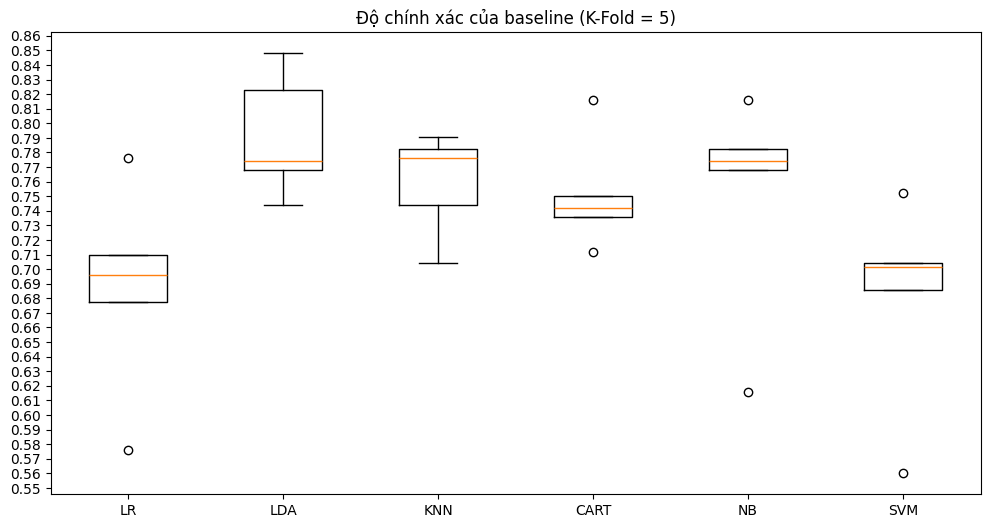

In [ ]:
from matplotlib import ticker
plt.figure(figsize=(12,6))
plt.boxplot(baseline_results.values())
plt.gca().set_xticklabels(baseline_results.keys())
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.01))
plt.title(f'Độ chính xác của baseline (K-Fold = {params["k_fold"]})')
plt.show()

- **Mô tả:**
    - Sử dụng chiếc lược K-Folds Cross validation để chia dữ liệu trên tập train
    - Các mô hình cơ sở được sử dụng:
        - LR
        - LDA
        - KNN
        - CART
        - NB
        - SVM
- **Nhận xét:**
    - Mô hình LDA có trung bình độ chuẩn xác (mean accuracy) cao nhất.
    - Tuy nhiên median của LDA thấp hơn KNN.